In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [10]:
#QUESTÃO 1
arquivo_csv = "vendas.csv"
df = pd.read_csv(arquivo_csv)

print(df.head())


         Data   Produto  Quantidade    Preço
0  2024-02-04   Monitor           3  1748.66
1  2024-01-18  Notebook          10  1843.12
2  2024-01-13   Teclado           0     0.00
3  2024-01-15   Cadeira           8   311.26
4  2024-02-19   Teclado           6  1472.34


In [ ]:
#QUESTÃO 2
df.replace({"": None, 0: None}, inplace=True)

df = df.dropna()

df["Data"] = pd.to_datetime(df["Data"], errors='coerce')

df["Quantidade"] = (df["Quantidade"] - df["Quantidade"].min()) / (df["Quantidade"].max() - df["Quantidade"].min())

print(df.head())

        Data   Produto Quantidade    Preço
0 2024-02-04   Monitor   0.222222  1748.66
1 2024-01-18  Notebook        1.0  1843.12
3 2024-01-15   Cadeira   0.777778   311.26
4 2024-02-19   Teclado   0.555556  1472.34
5 2024-02-20   Cadeira   0.888889  1356.92


In [30]:
#QUESTÃO 3
print(df)
mean = df["Preço"].mean()

median = df["Preço"].median()

std = df["Preço"].std()

mode = df["Preço"].mode()


print(f"Média: {mean}")
print(f"Mediana: {median}")
print(f"Desvio Padrão: {std}")
if len(mode) == 1:
    print(f"Moda: {mode[0]}")
elif len(mode) > 1 and len(mode) < len(df["Preço"].unique()):
    print(f"Modas (multimodal): {', '.join(map(str, mode))}")
else:
    print("Moda: Não há moda nos dados")

         Data     Produto Quantidade    Preço  Alta_Venda
0  2024-02-04     Monitor   0.222222  1748.66           0
1  2024-01-18    Notebook        1.0  1843.12           1
3  2024-01-15     Cadeira   0.777778   311.26           1
4  2024-02-19     Teclado   0.555556  1472.34           1
5  2024-02-20     Cadeira   0.888889  1356.92           1
6  2024-01-14     Monitor   0.888889  1874.88           1
7  2024-01-28     Cadeira   0.555556   277.37           1
8  2024-01-16  Impressora   0.555556  1357.89           1
9  2024-01-27     Teclado   0.333333  1823.35           0
10 2024-02-25    Notebook   0.222222   774.43           0
11 2024-02-01       Mouse   0.444444   697.74           0
13 2024-01-30     Headset   0.777778  1564.76           1
14 2024-02-04     Cadeira   0.111111   726.84           0
15 2024-01-21        Mesa   0.333333  1133.44           0
16 2024-01-14     Teclado   0.222222  1168.43           0
17 2024-01-29     Cadeira   0.333333   273.53           0
18 2024-02-14 

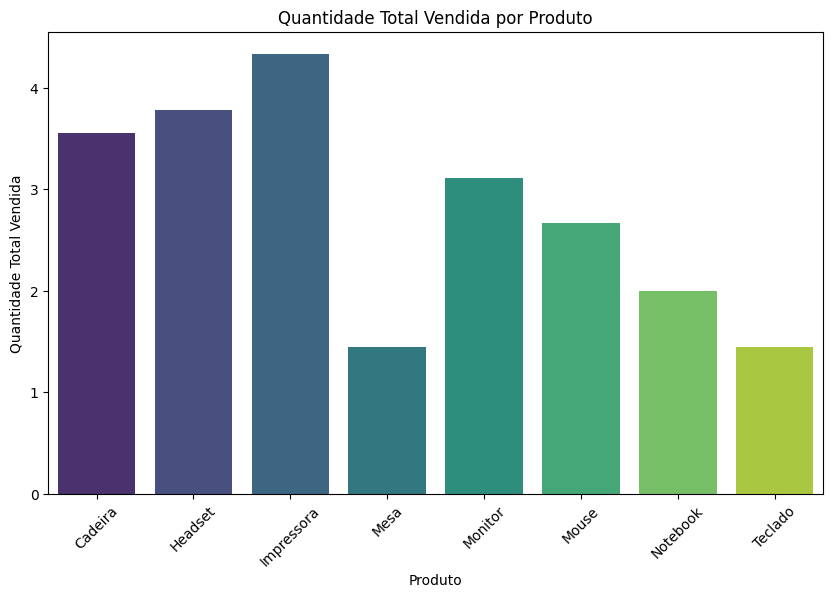

In [ ]:
#QUESTÃO 4
df_grouped = df.groupby("Produto")["Quantidade"].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x="Produto", y="Quantidade", hue="Produto", data=df_grouped, palette="viridis", legend=False)
plt.xlabel("Produto")
plt.ylabel("Quantidade Total Vendida")
plt.title("Quantidade Total Vendida por Produto")
plt.xticks(rotation=45)
plt.show()


Matriz de Confusão:
 [[2 2]
 [2 3]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50         4
           1       0.60      0.60      0.60         5

    accuracy                           0.56         9
   macro avg       0.55      0.55      0.55         9
weighted avg       0.56      0.56      0.56         9



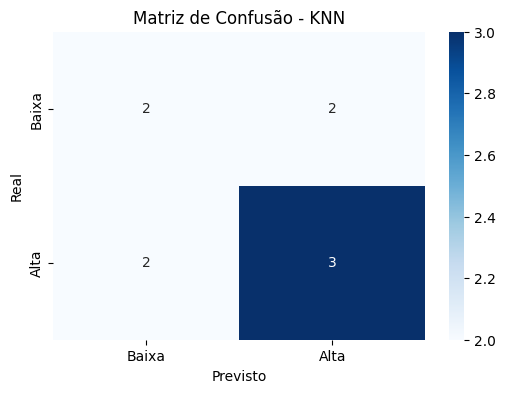

In [ ]:
#QUESTÃO 5

media_quantidade = df["Quantidade"].mean()
df["Alta_Venda"] = (df["Quantidade"] > media_quantidade).astype(int)
#print(media_quantidade)
#print(df)

X = df[["Preço", "Quantidade"]]  # Features 
y = df["Alta_Venda"]  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:\n", conf_matrix)
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Baixa", "Alta"], yticklabels=["Baixa", "Alta"])
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão - KNN")
plt.show()
